In [1]:
from utils.visual import *
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
import os

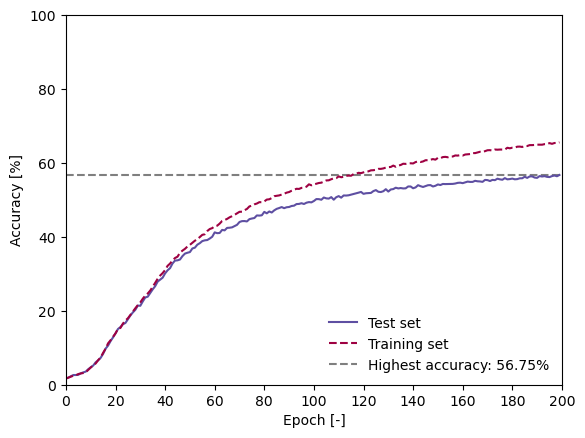

In [106]:
n_iterations = 1
paths = [
    "./saved_deep_models/20240924-090921-MESU-CifarNetBayesian-BS128-1024-CIFAR100-relu",
]
testing_accuracies = []
training_accuracies = []
for path in paths:
    tr_accuracies = []
    te_accuracies = []
    for it in range(n_iterations):
        te_accuracies.append(torch.load(os.path.join(path, f"params-network-{it}", "accuracy.pt")))
        tr_accuracies.append(torch.load(os.path.join(path, f"params-network-{it}", "training_accuracy.pt")))
    tr_accuracies = torch.stack(tr_accuracies)
    te_accuracies = torch.stack(te_accuracies)
    training_accuracies.append(tr_accuracies)
    testing_accuracies.append(te_accuracies)
training_accuracies = torch.stack(training_accuracies).cpu()
testing_accuracies = torch.stack(testing_accuracies).cpu()


# plot testing accuracies 
fig, ax = plt.subplots()
mean = testing_accuracies.mean(dim=0)[0]*100
color = plt.get_cmap('Spectral_r', 2)
ax.plot(mean, label="Test set", color=color(0))
mean_tr = training_accuracies.mean(dim=0)[0]*100
ax.plot(mean_tr, label="Training set", linestyle="--", color=color(1))
# plot max test accuracy
max_test_acc = mean.max().item()
ax.axhline(max_test_acc, color="black", linestyle="--", label=f"Highest accuracy: {max_test_acc:.2f}%", alpha=0.5, zorder=-1)

ax.set_xlabel("Epoch [-]")
ax.set_ylabel("Accuracy [%]")
ax.legend(frameon=False, loc="lower right")
ax.set_xlim(0, len(mean))
ax.set_ylim(0, 100)
ax.xaxis.set_major_locator(MultipleLocator(20))
plt.show()
        

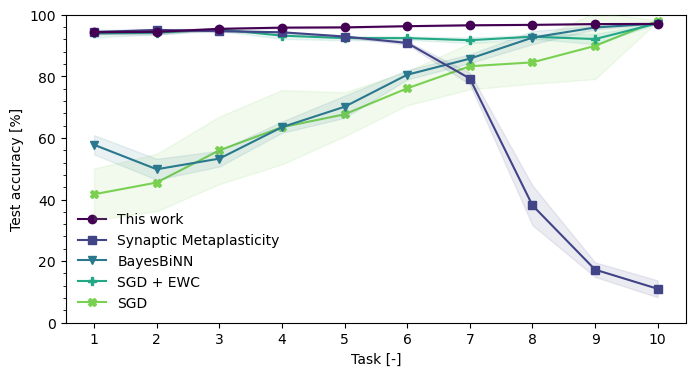

In [99]:
n_iterations = 5
paths = [
    "./paper/saved_results/20240906-170424-BHUparallel-BiBayesianNN-BS128-512-PermutedMNIST-gate",
    "./paper/saved_results/20240906-164726-MetaplasticAdam-BiNN-BS128-512-PermutedMNIST-gate",
    "./paper/saved_results/20240906-161705-BayesBiNN-DNN-BS128-512-PermutedMNIST-gate",
    "./paper/saved_results/20240911-092147-SGD-DNN-BS128-512-PermutedMNIST-relu",
    "./paper/saved_results/20240912-081935-SGD-DNN-BS128-512-PermutedMNIST-relu",
]
model_names = [
    "This work", 
    "Synaptic Metaplasticity",
    "BayesBiNN",
    "SGD + EWC",
    "SGD"
]

models = []
for path in paths:
    accuracies = []
    for it in range(n_iterations):
        accuracies.append(torch.stack(torch.load(os.path.join(path, f"params-network-{it}", "accuracy.pt"))))
    accuracies = torch.stack(accuracies)
    models.append(accuracies)
models = torch.stack(models)
fig, ax = plt.subplots(figsize=(8, 4))
palette = plt.get_cmap('viridis', len(models)*2+1)

markers = ["o", "s", "v", "P", "X"]
k=0
for i, model in enumerate(models):
    mean, std = get_mean_std_accuracies(model, t_start=1, t_end=10)
    ax.plot(mean, color=palette(k), label=model_names[i], marker=markers[i], zorder = 10-i)
    ax.fill_between(np.arange(0, 10), mean-std, mean+std, color=palette(k), alpha=0.1, zorder = 10-i)
    k+=2
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_xlabel("Task [-]")
ax.set_ylabel("Test accuracy [%]")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.set_ylim(0, 100)
ax.legend(frameon=False)
title = versionning(folder="./paper/figures", title="permutedMNIST", format=".pdf")
plt.savefig(title, format="pdf", bbox_inches='tight')
plt.savefig(title.replace(".pdf", ".svg"), format="svg", bbox_inches='tight')
plt.show()

In [ ]:
# Given p, plot two bars corresponding to the probability of the two classes -1 and 1 
p = 0.25

# Plot the two bars
fig, ax = plt.subplots(figsize=(2, 3))
colormap = plt.cm.get_cmap('coolwarm')
# bar should be touching each other
ax.bar([-1, 1], [1-p, p], color=[colormap(0), colormap(255)], edgecolor='black', linewidth=1, width=2)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# remove ticks
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# remove labels
ax.set_xticklabels([])
ax.set_yticklabels([])
# write 1 
ax.text(1, p, '1', ha='center', va='bottom', color='black', fontsize=18)
# write -1
ax.text(-1, 1-p, '-1', ha='center', va='bottom', color='black', fontsize=18)
ax.set_ylim([0, 1])
plt.show()

In [ ]:
n_iterations = 1
paths = [
    "./paper/activation/2024-07-03-09h07:57-BHUparallel-BS128-512-PermutedMNIST-sign-v1",
    "./paper/activation/2024-07-03-09h17:36-BHUparallel-BS128-512-PermutedMNIST-relu-v1",
    "./paper/activation/2024-07-03-09h26:54-BHUparallel-BS128-512-PermutedMNIST-gate-v1"
]
model_names = [
    "Sign", 
    "ReLU",
    "Gate"
]

models = []
for path in paths:
    accuracies = []
    for it in range(n_iterations):
        accuracies.append(torch.load(os.path.join(path, f"params-network-{it}", "accuracy.pt")))
    models.append(accuracies)
    
fig, ax = plt.subplots()
palette = plt.get_cmap('viridis', len(models)+1)
for i, model in enumerate(models):
    mean, std = get_mean_std_accuracies(model, t_start=1, t_end=10)
    ax.plot(mean, color=palette(i), label=model_names[i], marker="o")
    ax.fill_between(np.arange(0, 10), mean-std, mean+std, color=palette(i), alpha=0.2)

# hline: fully connected
#ax.axhline(y=97.95, color="black", linestyle='--', alpha=0.5, label="Baseline (Adam)")
#ax.fill_between(np.arange(0, 10), 97.95-0.05, 97.95+0.05, color="black", alpha=0.2)


ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_xlabel("Task [-]")
ax.set_ylabel("Test accuracy [-]")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.legend(frameon=False)
ax.set_ylim(40, 100)

title = versionning(folder="./paper/figures", title="activation", format=".pdf")
plt.savefig(title, format="pdf", bbox_inches='tight')
plt.savefig(title.replace(".pdf", ".svg"), format="svg", bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './paper/activation/2024-07-03-09h07:57-BHUparallel-BS128-512-PermutedMNIST-sign-v1/params-network-0/accuracy.pt'

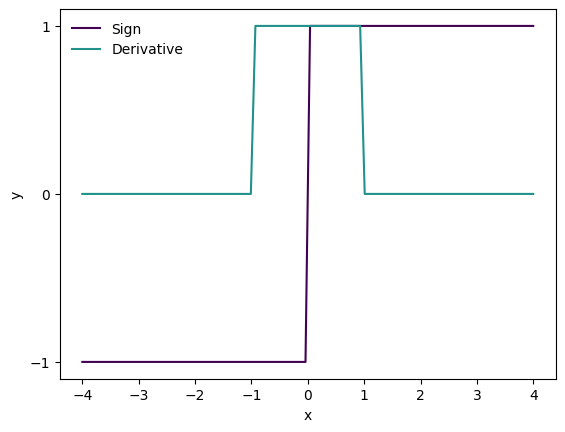

In [ ]:
x = torch.linspace(-4, 4, 100)
palette = plt.get_cmap('viridis', 3)
sign = lambda x: x.sign()

# 1 when x in [-1, 1], 0 otherwise
backprop = lambda x: (x > -1).float() * (x < 1).float()
fig, ax = plt.subplots()
ax.plot(x, sign(x), label="Sign", color=palette(0))
ax.plot(x, backprop(x), label="Derivative", color=palette(1))
ax.legend(frameon=False)
ax.set_xlabel("x")
ax.set_ylabel("y")
# one tick every 0.5 on y on major ticks
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
title = versionning(folder="./paper/figures", title="sign", format=".pdf")
plt.savefig(title, format="pdf", bbox_inches='tight')
plt.savefig(title.replace(".pdf", ".svg"), format="svg", bbox_inches='tight')
plt.show()

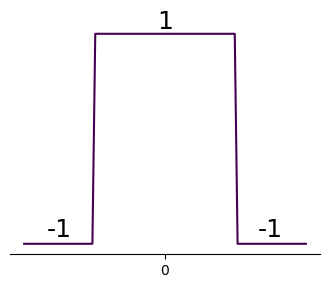

In [141]:
x = torch.linspace(-2, 2, 100)
width = 1
palette = plt.get_cmap('viridis', 3)
gate = lambda x, width: 2*(x.abs() < width).float() - 1
backprop = lambda x, width: (((x > -3*width/2) & (x < -width/2)).float() -
                              ((x > width/2) & ((x < 3*width/2))).float())
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, gate(x, width), label="Gate", color=palette(0))
#ax.plot(x, backprop(x, width), label="Derivative", color=palette(1))
#ax.legend(frameon=False)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# one tick every 0.5 on y on major ticks
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
title = versionning(folder="./paper/figures", title="gate", format=".pdf")
plt.savefig(title, format="pdf", bbox_inches='tight')
plt.savefig(title.replace(".pdf", ".svg"), format="svg", bbox_inches='tight')
# remove splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
# remove ticks
ax.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False)
# remove labels 
ax.set_xticks([0])
# remove yticks and labels
ax.set_yticks([])
ax.set_yticklabels([])
# text 1 on top and -1 on bottom
ax.text(0, 1, '1', ha='center', va='bottom', color='black', fontsize=18)
# -1 should be on top of the graph on the bottom left and bottom right
ax.text(-1.5, -0.75, '-1', ha='center', va='top', color='black', fontsize=18)
ax.text(1.5, -0.75, '-1', ha='center', va='top', color='black', fontsize=18)
plt.show()

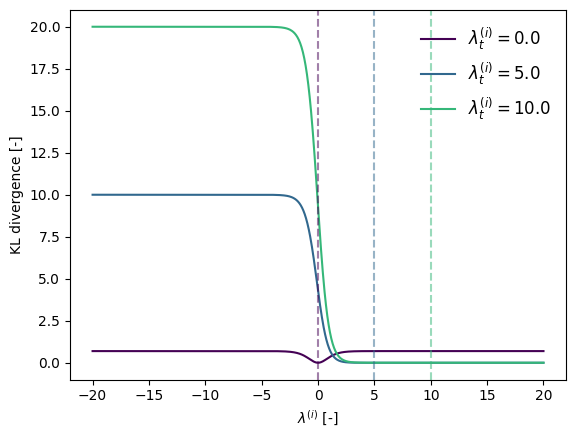

In [ ]:
lambda_t = torch.tensor([0, 5, 10])
lambda_ = torch.linspace(-20, 20, 1000)

# KL divergence
kl = lambda lambda_, lambda_t: torch.tanh(lambda_)*(lambda_-lambda_t) + 1/2 * torch.log(torch.cosh(lambda_t)**2 / torch.cosh(lambda_)**2)
cm = plt.get_cmap('viridis', len(lambda_t)+1)
# plot 
for i, lbd_t in enumerate(lambda_t):
    plt.plot(lambda_, kl(lambda_, lbd_t).detach().numpy(), label=r'$\lambda^{(i)}_t' + f'={lbd_t:.1f}$', color=cm(i))
plt.xlabel(r'$\lambda^{(i)}$ [-]')
plt.ylabel('KL divergence [-]')
for i, lbd_t in enumerate(lambda_t):
    plt.axvline(lbd_t, linestyle='--', alpha=0.5, color=cm(i))
plt.legend(frameon=False, fontsize=12)

# save as pdf and svg
os.makedirs('paper', exist_ok=True)
plt.savefig('paper/kl_divergence.pdf', bbox_inches='tight')
plt.savefig('paper/kl_divergence.svg')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


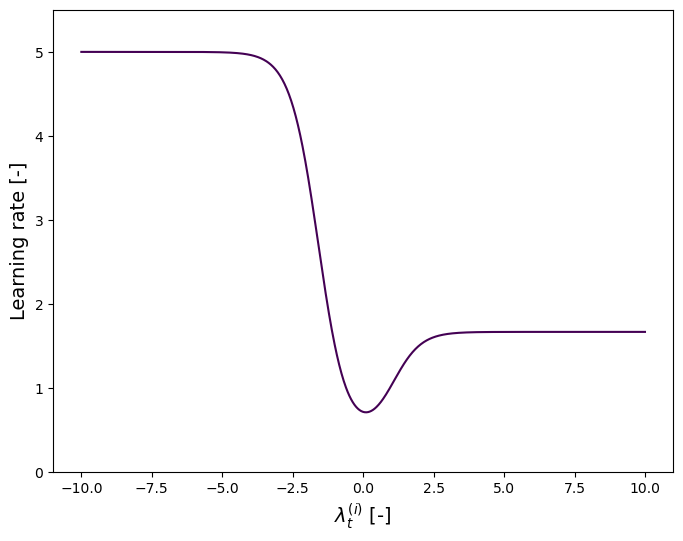

In [ ]:
 # plot 1/cosh²(x)
x = torch.linspace(-10, 10, 1_000)
grads = torch.tensor([0.1])
alpha = 5
# color map viridis
cm = plt.get_cmap('viridis', len(grads)+1)
plt.figure(figsize=(8, 6))
for index, grad in enumerate(grads):
    f = 1/(1/torch.cosh(x)**2 + grad*2*torch.tanh(x) + 2*torch.abs(grad) + 1/alpha)
    plt.plot(x, f, color=cm(index))
# graduate 
plt.yticks([0, 1, 2, 3, 4, 5])
# yticks minor
plt.ylim(0, 5.5)

plt.ylabel(r'Learning rate [-]', fontsize=14)
plt.legend(fontsize=12, frameon=False, loc='lower left')
plt.xlabel('$\lambda^{(i)}_t$ [-]', fontsize=14)

# save as pdf and svg
plt.savefig('paper/learning_rate.pdf', bbox_inches='tight')
plt.savefig('paper/learning_rate.svg')
plt.show()

In [ ]:
p = torch.arange(0, 1, 0.0001)
fct = 1/2 *torch.log(p/(1-p))
# add grid
fig, ax = plt.subplots(figsize=(5, 8))
# dashed line at y=0
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=4, color='black', linestyle='--')
ax.axhline(y=-4, color='black', linestyle='--')
# write a text above each dashed line corresponding to p=0, p=1/2, p=1
ax.text(0.3, 0.5, r'$p(w_i = 1) = \frac{1}{2}$', fontsize=12)
ax.text(0.3, 4.5, r'$p(w_i = 1) \approx 1$', fontsize=12)
ax.text(0.3, -3.5, r'$p(w_i = 1) \approx 0$', fontsize=12)

ax.set_xlabel(r'$p_i$ [-]', fontsize=12)
ax.set_ylabel(r'$\phi(p_i)$ [-]', fontsize=12)
ax.plot(p, fct, color='red')
 

In [ ]:
hessian = torch.load("hessian/hessian.pt")[-1].reshape(-1).detach().cpu()
lambda_ = torch.load("hessian/lambda.pt").reshape(-1).detach().cpu()
grad = torch.load("hessian/gradient.pt")[-1].reshape(-1).detach().cpu()

plt.figure()
# Plot y = hessian and x = lambda
plt.scatter(lambda_, hessian, c='b', marker='o')
plt.xlabel('$\lambda$ [-]')
plt.ylabel(r'Hessian diagonal w.r.t $\lambda$ [-]')
plt.show()

p = torch.sigmoid(2*lambda_)
dlbddp = 1/(2*p - (2*p)**2 + 1e-5)
dlbddp2 = (2*p-1) / (2*(p-1)**2 * p**2+ 1e-5)
dLdp2 = hessian * dlbddp**2 + dlbddp2*grad
plt.scatter(p, hessian, c='r', marker='o')
plt.xlabel('$p$ [-]')
plt.ylabel(r'Hessian diagonal w.r.t p [-]')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'hessian/hessian.pt'